# TP Boîds

## Import

In [10]:
import numpy as np

from IPython.display import HTML as display

In [ ]:
from matplotlib import animation
from matplotlib import pyplot as plt
plt.rcParams['axes.facecolor'] = 'midnightblue'
%matplotlib inline

## Prepare simulation

In [2]:
boid_count = 40
limits = np.array([2000, 2000])
positions = np.random.rand(2, boid_count) * limits[:, np.newaxis]


In [ ]:
def new_flock(count, lower_limits, upper_limits):
    width = upper_limits - lower_limits
    return (lower_limits[:, np.newaxis] + np.random.rand(2, count) * width[:, np.newaxis])

In [ ]:
#TODO fonctions de cohesion, separation, straight 

In [6]:
def update_boids(positions, velocities):
    move_to_middle_strength = 0.01
    middle = np.mean(positions, 1)
    direction_to_middle = positions - middle[:, np.newaxis]
    velocities -= direction_to_middle * move_to_middle_strength

    separations = positions[:, np.newaxis, :] - positions[:, :, np.newaxis]
    squared_displacements = separations * separations
    square_distances = np.sum(squared_displacements, 0)
    alert_distance = 100
    far_away = square_distances > alert_distance
    separations_if_close = np.copy(separations)
    separations_if_close[0, :, :][far_away] = 0
    separations_if_close[1, :, :][far_away] = 0
    velocities += np.sum(separations_if_close, 1)

    positions += velocities

## Visualizaton

In [ ]:
def animate(frame):
    update_boids(positions, velocities)
    scatter.set_offsets(positions.transpose())

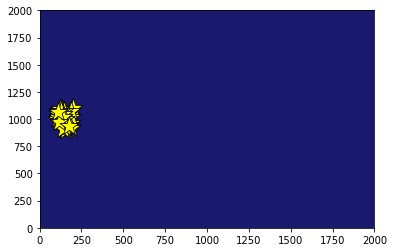

In [7]:
positions = new_flock(boid_count, np.array([100, 900]), np.array([200, 1100]))
velocities = new_flock(boid_count, np.array([0, -20]), np.array([10, 20]))


figure = plt.figure()
axes = plt.axes(xlim=(0, limits[0]), ylim=(0, limits[1]))
scatter = axes.scatter(positions[0, :], positions[1, :],
                       marker='*', s=400, edgecolor='k', color='yellow', lw=0.8)

In [8]:
anim = animation.FuncAnimation(figure, animate,frames=200, interval=50)
display(anim.to_jshtml())

2.63775546  45.46164987
    3.59240036  21.56023657  10.62917856  26.44103524 -28.94523994
  -14.83870256  11.59550558   3.61060597  11.14908009  -5.59821842
   28.147544    -7.79260076  -6.61742691  -7.22978683 -16.5338363
    4.16262364  -6.01544002  23.67015345  36.99128128  -6.4817076
   16.06202381   9.57711819  13.12810783  15.55649973   4.04929412
   -3.84428465  10.14328359  -9.8449817   13.63500991  23.41290834]
 [ 52.87028189  -8.81659913  10.77713386  18.14311845  -0.33800906
    1.9311378   15.4340433  -41.38577189 -14.51885154  -6.20590373
    2.9696372   13.08325694   8.79467488 -23.91509646  -0.77017126
    9.75142051 -17.88649246   7.06781973   4.50859249  -4.5481803
   12.64601141   2.46519438  24.27365258 -19.69341084   1.42880894
   28.78865497  -7.71037887 -25.56355414  -9.68297549  26.5584814
    5.86054823  -8.68969406 -20.28227877  31.35167975  10.96451259
    6.32736701 -23.77848529 -27.24321536 -34.04954485 -34.37156546]]
P : [[1118.69261916 1210.44043699 1487.